In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the log files
log_directory = '/home/patrick_w/sim_loop/results/logs/'

# Get a sorted list of all .txt files in the directory
log_files = sorted([f for f in os.listdir(log_directory) if f.endswith('.txt')])

# Initialize a list to hold all parameter dictionaries
all_parameters = []

# Loop through each log file and read its contents
for filename in log_files:
    log_file_path = os.path.join(log_directory, filename)
    
    # Open the log file and read its contents
    with open(log_file_path, 'r') as file:
        log_contents = file.readlines()  # Read lines into a list
    
    # Initialize a dictionary to hold parameters
    parameters = {}
    parameters_started = False
    collision_detected = False  # Flag to check for collision line

    # Loop through the lines to find "6 parameters:" and extract parameters
    for line in log_contents:
        if "6 parameters:" in line:
            parameters_started = True  # Start reading parameters
            continue  # Skip the line with "6 parameters:"
        
        # Check for the collision line
        if "Collision" in line:
            collision_detected = True

        if parameters_started:
            # Split the line into key and value
            if '=' in line:
                key, value = line.split('=')
                key = key.replace(' ', '')
                value = value.replace(' ', '')
                value = value.replace("\n", "")
                parameters[key.strip()] = float(value.strip())  # Store as float
                if key == "EgoStartS":
                    parameters_started = False

    # Add collision information to the parameters dictionary
    parameters['CollisionDetected'] = collision_detected
    parameters['Filename'] = filename  # Optionally include the filename

    # Append the parameters dictionary to the list
    all_parameters.append(parameters)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_parameters)

# Save the DataFrame to a CSV file
output_file = '/home/patrick_w/sim_loop/results/compiled_log_data.csv'
df.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to /home/patrick_w/sim_loop/results/compiled_log_data.csv


In [9]:
# Replace 'your_file.csv' with the path to your CSV file
file_path = '/home/patrick_w/sim_loop/results/compiled_log_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Count the number of True and False values
true_count = df['CollisionDetected'].sum()  # True values count
false_count = (~df['CollisionDetected']).sum()  # False values count

# Calculate the ratio
if false_count > 0:  # Avoid division by zero
    ratio = true_count / false_count
else:
    ratio = float('inf')  # or some other value to indicate no False values

print(f"Number of True values: {true_count}")
print(f"Number of False values: {false_count}")
print(f"Ratio of True to False: {ratio}")

Number of True values: 43
Number of False values: 61
Ratio of True to False: 0.7049180327868853


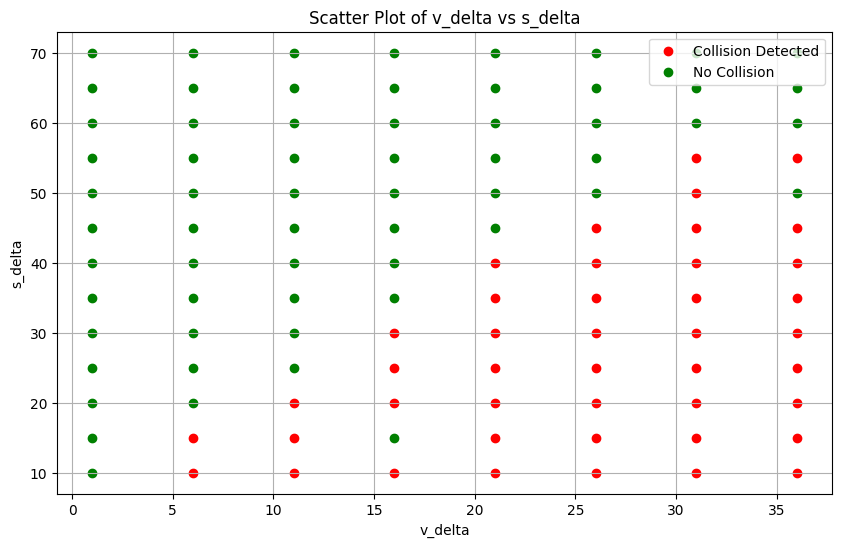

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot points based on CollisionDetected
plt.scatter(df['v_delta'][df['CollisionDetected']], 
            df['s_delta'][df['CollisionDetected']], 
            color='red', label='Collision Detected')

plt.scatter(df['v_delta'][~df['CollisionDetected']], 
            df['s_delta'][~df['CollisionDetected']], 
            color='green', label='No Collision')

# Adding labels and title
plt.xlabel('v_delta')
plt.ylabel('s_delta')
plt.title('Scatter Plot of v_delta vs s_delta')
plt.legend()
plt.grid()

# Show the plot
plt.savefig('v_delta_s_delta.svg')
plt.show()
